# (prosperLoanData)
## by (Hossam Sherif Mohamed)

## Preliminary Wrangling

> Prosper loan dataset consists of 113937 observations and 81 feature 

In [132]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [133]:
loan_df=pd.read_csv('prosperLoanData.csv')
print(loan_df.shape)
loan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [134]:
loan_df_updated=loan_df[['Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield',
                         'EstimatedReturn','ProsperScore','ProsperRating (Alpha)','EmploymentStatus','StatedMonthlyIncome'
                        ,'LoanOriginalAmount']]
loan_df_updated.shape

(113937, 11)

### I only used the features of interest that i will invistigate on so I took only 11 features out of the 81 feature

In [135]:
loan_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Term                   113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   BorrowerRate           113937 non-null  float64
 4   LenderYield            113937 non-null  float64
 5   EstimatedReturn        84853 non-null   float64
 6   ProsperScore           84853 non-null   float64
 7   ProsperRating (Alpha)  84853 non-null   object 
 8   EmploymentStatus       111682 non-null  object 
 9   StatedMonthlyIncome    113937 non-null  float64
 10  LoanOriginalAmount     113937 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 9.6+ MB


In [136]:
loan_df_updated.dropna(inplace=True)
loan_df_updated.drop_duplicates(inplace=True)
loan_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81958 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   81958 non-null  int64  
 1   LoanStatus             81958 non-null  object 
 2   BorrowerAPR            81958 non-null  float64
 3   BorrowerRate           81958 non-null  float64
 4   LenderYield            81958 non-null  float64
 5   EstimatedReturn        81958 non-null  float64
 6   ProsperScore           81958 non-null  float64
 7   ProsperRating (Alpha)  81958 non-null  object 
 8   EmploymentStatus       81958 non-null  object 
 9   StatedMonthlyIncome    81958 non-null  float64
 10  LoanOriginalAmount     81958 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 7.5+ MB


C:\Users\twins\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\twins\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### In the cell above I removed all the records that contain NaNs , Also i removed any duplicated records

In [137]:
loan_df_updated.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,ProsperRating (Alpha),EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount
1,36,Current,0.12016,0.0920,0.0820,0.05470,7.0,A,Employed,6125.000000,10000
3,36,Current,0.12528,0.0974,0.0874,0.06000,9.0,A,Employed,2875.000000,10000
4,36,Current,0.24614,0.2085,0.1985,0.09066,4.0,D,Employed,9583.333333,15000
5,60,Current,0.15425,0.1314,0.1214,0.07077,10.0,B,Employed,8333.333333,15000
6,36,Current,0.31032,0.2712,0.2612,0.11070,2.0,E,Employed,2083.333333,3000


### What is the structure of your dataset?

> My dataset after cleaning and taking the features of interest consists of 81958 observations and 11 features

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is ProperScore , Prosper Rating

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term , StatedMonthlyIncome , LoanOriginalAmount , LoanStatus , EmploymentStatus , BorrowerAPR ,BorrowerRate , LenderYield , EstimatedReturn

## Univariate Exploration


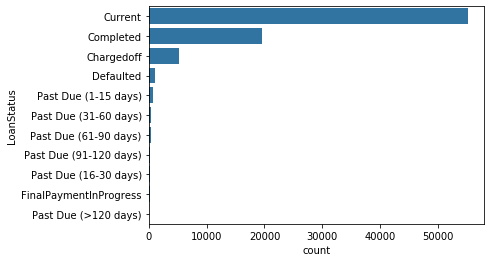

In [50]:
sorted_loan_status=loan_df_updated['LoanStatus'].value_counts().index
base = sb.color_palette()[0]
sb.countplot(data=loan_df_updated, y='LoanStatus',color=base,order=sorted_loan_status);

### We can see that the most common type is the current , and then the completed , we can also notice that as more day passes the loan status become less noticable 

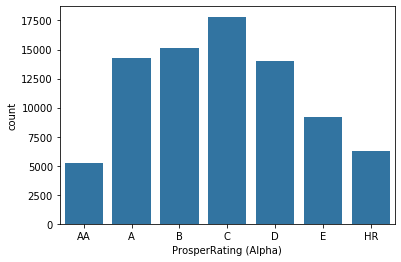

In [145]:
order_toshow=['AA','A','B','C','D','E','HR']
base = sb.color_palette()[0]
sb.countplot(data=loan_df_updated, x='ProsperRating (Alpha)',color=base ,order=order_toshow);

### We can notice here that the most common prosper rating is C , and we also can see that the distribution of ProsperRating is approximately normally distributed

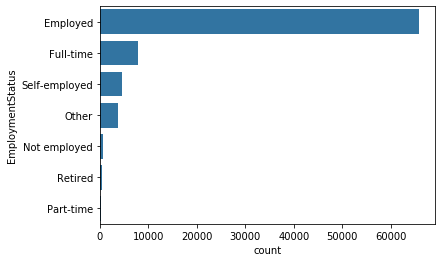

In [106]:
sorted_employment_status=loan_df_updated['EmploymentStatus'].value_counts().index
base = sb.color_palette()[0]
sb.countplot(data=loan_df_updated, y='EmploymentStatus',color=base,order=sorted_employment_status);

### We can see above that the most common employment status is employed and the least common employment status is Part-time

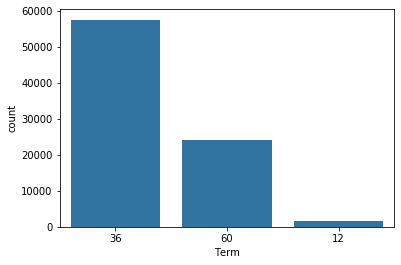

In [108]:
sorted_term=loan_df_updated['Term'].value_counts().index
base = sb.color_palette()[0]
sb.countplot(data=loan_df_updated, x='Term',color=base,order=sorted_term);

### We can see that the most common loans are 36 month duration , and the least are 12 month (1 year) duration

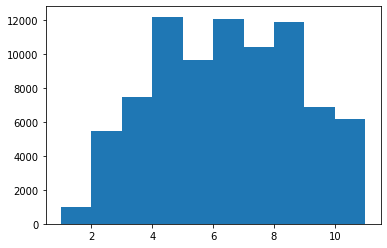

In [70]:
plt.hist(data = loan_df_updated, x = 'ProsperScore');

### We can see that the distribution of ProsperScore is multimodal distribution , with the most common values from 4 to 8

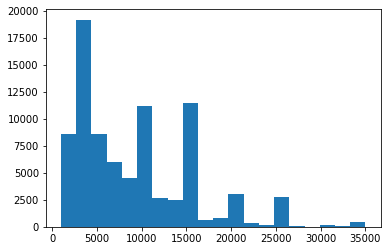

In [78]:
plt.hist(data = loan_df_updated, x = 'LoanOriginalAmount',bins=20);

### We can see that the most common LoanOriginalAmount  is around 5000 ,10000 , 20000 , and  the loans become less significantly common as their amount increases

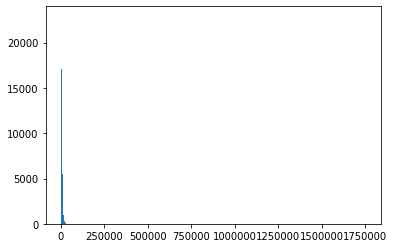

In [150]:
#print(loan_df_updated['StatedMonthlyIncome'].max()+5)
bins = np.arange(0, loan_df_updated['StatedMonthlyIncome'].max()+1750, 1750)
plt.hist(data = loan_df_updated, x = 'StatedMonthlyIncome',bins=bins);

### We can notice that the distribution of stated monthly income is skewed to the right , so lets deal with the outliers 

(0, 22579.128077008074)

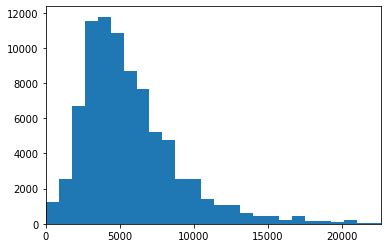

In [102]:
'''
I will draw only the data that is far from the mean with 2 standard deviation as most of the data should be focused 
 in that part
'''
mean_income=np.mean(loan_df_updated['StatedMonthlyIncome'])
std_income=np.std(loan_df_updated['StatedMonthlyIncome'])

plt.hist(data = loan_df_updated, x = 'StatedMonthlyIncome',bins=2000);
plt.xlim(0,(2*std_income)+mean_income)

### We can see that the distribution now is more obvious , it is still skewed to the right , and the most common income is around 5000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of ProsperRating & ProsperScore are almost normally distributed , No I did't need to perform any transformations for my variables of interest

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of StatedMonthlyIncome was unusual it is skewed to the right with approximately 99% of the data below 20000 , but there was outliers that was very far from 20000 , so I had to remove these outliers from the distribution and plot it again in order to see the distribution well , I also found many of the null values in many columns so I had to remove these records in order not to affect my findings

## Bivariate Exploration


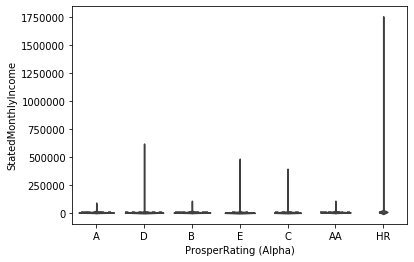

In [118]:
base = sb.color_palette()[0]
sb.violinplot(data=loan_df_updated, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', color=base, inner='quartile')


### We can see that the violin plots isn't clear at all due to the outliers 

(-10000, 22579.128077008074)

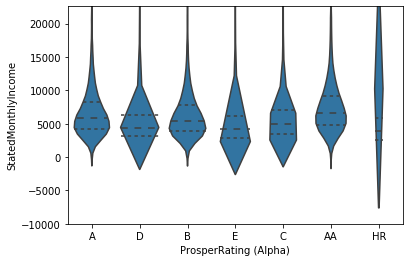

In [119]:
base = sb.color_palette()[0]
sb.violinplot(data=loan_df_updated, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', color=base, inner='quartile')

mean_income=np.mean(loan_df_updated['StatedMonthlyIncome'])
std_income=np.std(loan_df_updated['StatedMonthlyIncome'])

plt.ylim(-10000,(2*std_income)+mean_income)

### We can see now after limiting the y-axis with the new boundaries that the widest monthly income distribution is for the HR ProsperRating type and AA type has the highest median

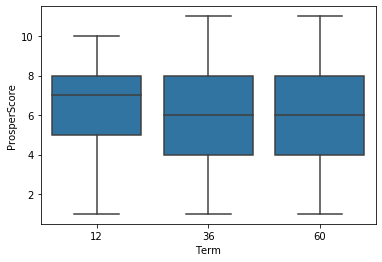

In [122]:
base = sb.color_palette()[0]
sb.boxplot(data=loan_df_updated, x='Term', y='ProsperScore', color=base);

### We can see that the individuals with the 12 month term loan seems to have a higher prosper score median than others

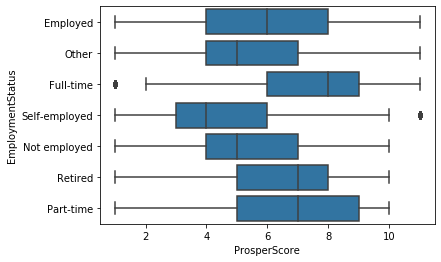

In [124]:
base = sb.color_palette()[0]
sb.boxplot(data=loan_df_updated, y='EmploymentStatus', x='ProsperScore', color=base);

### We can see that the empolyed status that in common has the highest ProsperScore is Full-time than part-time and Retired , and the one with the least prosper score is the Self-employed

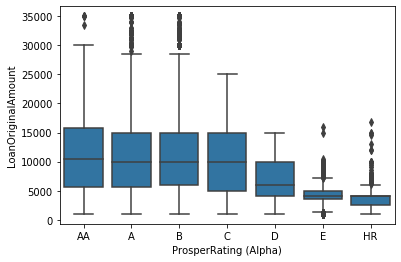

In [144]:
order_toshow=['AA','A','B','C','D','E','HR']
base = sb.color_palette()[0]
sb.boxplot(data=loan_df_updated, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base, order=order_toshow);

### We can notice from the figure above that the individuals that takes the largest loan amount are those the ones with the highest ProsperRating 

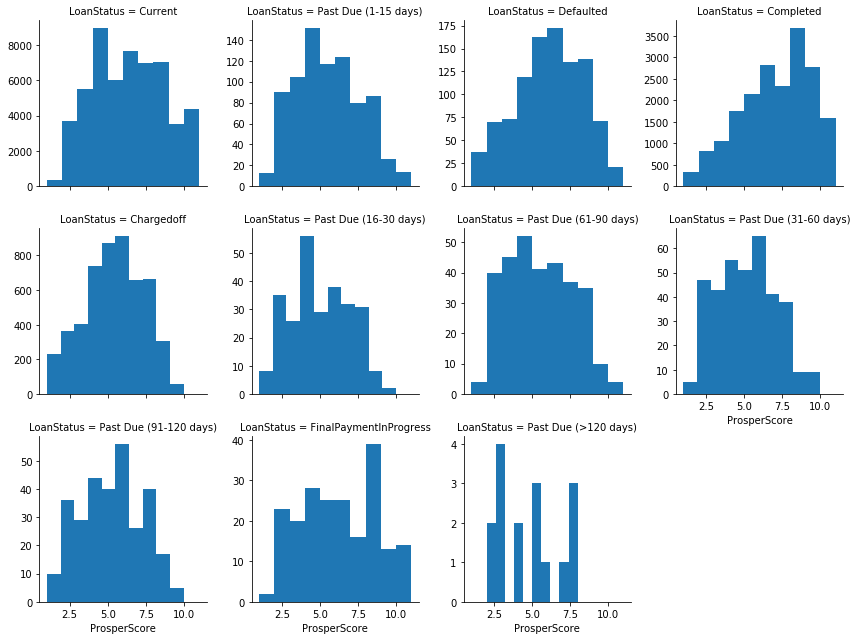

In [140]:
g = sb.FacetGrid(data = loan_df_updated, col = 'LoanStatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'ProsperScore');

### We can see from the grid above the distribution of each loan status with the ProsperScore

Text(0, 0.5, 'Avg. LenderYield')

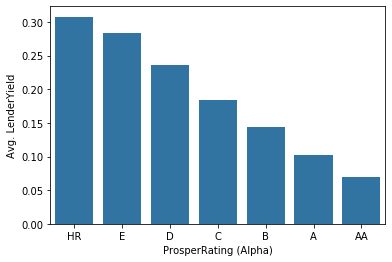

In [148]:
order_toshow=['HR','E','D','C','B','A','AA']
base = sb.color_palette()[0]
sb.barplot(data=loan_df_updated, x='ProsperRating (Alpha)', y='LenderYield', color=base,order=order_toshow,errwidth=0)
plt.ylabel('Avg. LenderYield')

### We can see that as the ProsperRating is better, the mean of lenderYield decreases

(-1000, 22579.128077008074)

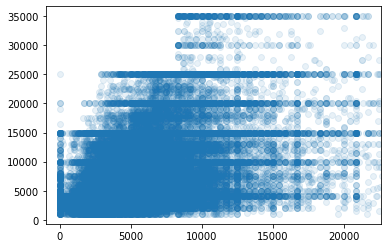

In [214]:
plt.scatter(data = loan_df_updated, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount',alpha=0.1);
plt.xlim(-1000,(2*std_income)+mean_income)

### We can see that the stated monthly income seems to be postive correlated with loan original amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can see that the individuals with the 12 month term loan seems to have a higher prosper score median than others , we also can see that the individuals with the highest prosper rating are quailfied to the leargest loan amounts , we can also see that the individuals with full time employment status has the highest prosper score among all other employment status

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that there seems to be a little postive correlations with stated monthly income and loan original amount

## Multivariate Exploration


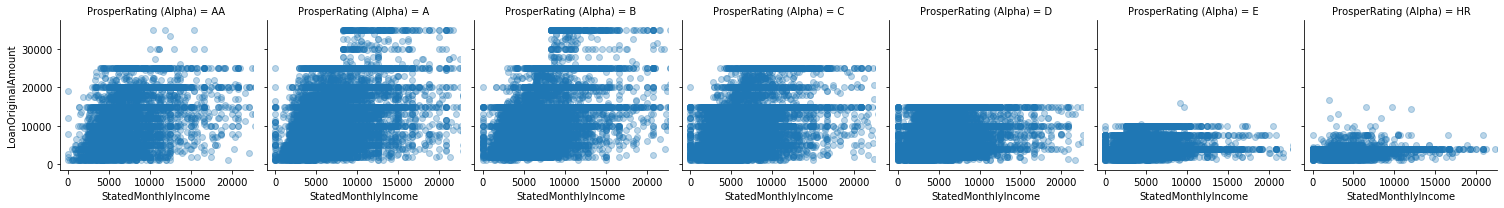

In [188]:
order_toshow=['AA','A','B','C','D','E','HR']
g = sb.FacetGrid(data = loan_df_updated, col = 'ProsperRating (Alpha)',col_order=order_toshow);
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount',alpha=0.3);
g.set(xlim=(-1000,(2*std_income)+mean_income))

### We can see from the grid above that as the prosper rating decreases , the correlation between the stated monthly income and the loan original amount decreases , we can also notice when the prosper rating is high and also the stated monthly income is large , the loan original amout seems to be larger in these cases

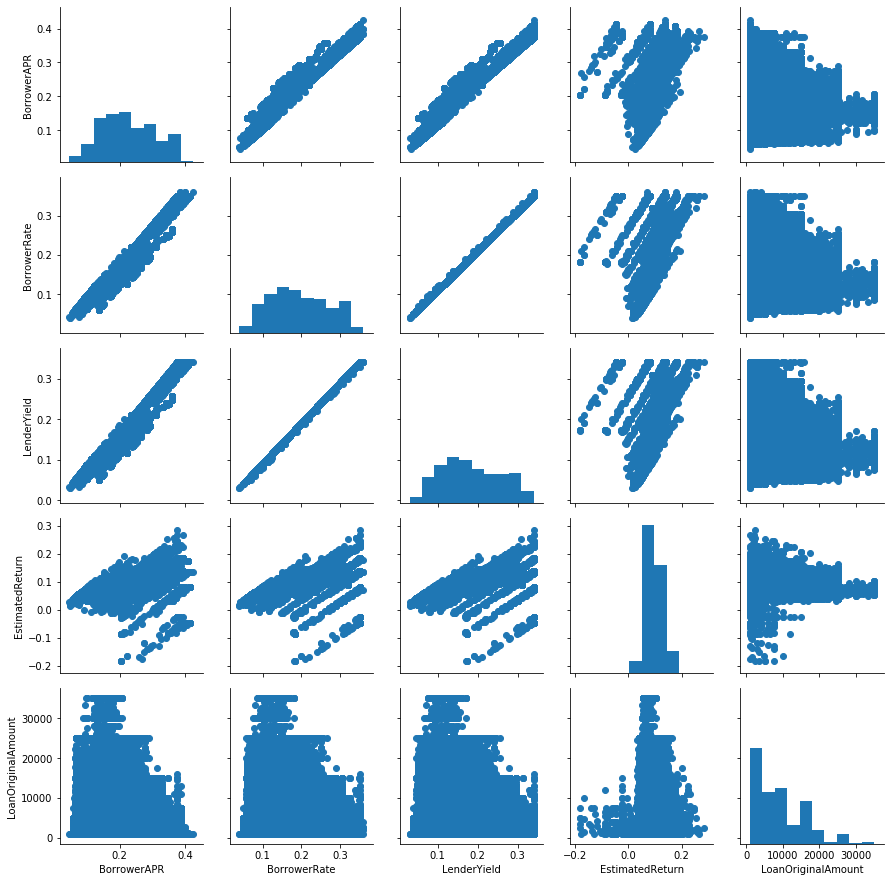

In [200]:
g = sb.PairGrid(data = loan_df_updated, vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedReturn',
                                               'LoanOriginalAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### We can notice that BorrowerARP , BorrowerRate , LenderYield , EstimatedReturn are strongly postive correlated with each other

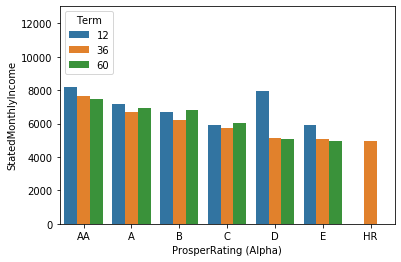

In [205]:
order_toshow=['AA','A','B','C','D','E','HR']
ax = sb.barplot(data = loan_df_updated, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term' ,
               order=order_toshow , errwidth=0)


### We can notice that the individuals with the higher ProsperRating has highest average monthly income for all terms except for the D Type 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that the stated montly income and loan original amount seems to be correlated with each other when the prosper rating is high (AA-A-B) , and there is no correlation between stated montly income and loan original amount when the prosper rating is low 

### Were there any interesting or surprising interactions between features?

> We can notice that BorrowerARP , BorrowerRate , LenderYield , EstimatedReturn are strongly postive correlated with each other